In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('breast_cancer_detection_data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [9]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
L=LabelEncoder()

In [13]:
y=L.fit_transform(y)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=66)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
S=StandardScaler()

In [18]:
X_train=S.fit_transform(X_train)
X_test=S.fit_transform(X_test)

In [20]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [50]:
from tensorflow.keras.layers import BatchNormalization

In [61]:
model=Sequential()
model.add(Dense(9,activation='relu',input_dim=30))
model.add(Dense(9,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [62]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 9)                 279       
                                                                 
 dense_16 (Dense)            (None, 9)                 90        
                                                                 
 dense_17 (Dense)            (None, 1)                 10        
                                                                 
Total params: 379 (1.48 KB)
Trainable params: 379 (1.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
Callback=EarlyStopping(monitor='val_loss',min_delta=0.00001,patience=20,verbose=1,mode='auto',baseline=None,restore_best_weights=False)

In [66]:
model_new = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),callbacks=Callback)

Epoch 1/100
15/15 [==============================] - 1s 31ms/step - loss: 0.6880 - accuracy: 0.5846 - val_loss: 0.6447 - val_accuracy: 0.6579
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5752 - accuracy: 0.7934 - val_loss: 0.5571 - val_accuracy: 0.8158
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 0.4972 - accuracy: 0.8835 - val_loss: 0.4896 - val_accuracy: 0.8596
Epoch 4/100
15/15 [==============================] - 0s 10ms/step - loss: 0.4331 - accuracy: 0.9055 - val_loss: 0.4241 - val_accuracy: 0.9035
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3723 - accuracy: 0.9297 - val_loss: 0.3631 - val_accuracy: 0.9211
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3167 - accuracy: 0.9363 - val_loss: 0.3087 - val_accuracy: 0.9386
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 0.2684 - accuracy: 0.9429 - val_loss: 0.2618 - val_accuracy: 0.9474
Epoch 8/100

Epoch 59/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0357 - accuracy: 0.9934 - val_loss: 0.0530 - val_accuracy: 0.9912
Epoch 60/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0353 - accuracy: 0.9934 - val_loss: 0.0529 - val_accuracy: 0.9912
Epoch 61/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0346 - accuracy: 0.9934 - val_loss: 0.0524 - val_accuracy: 0.9912
Epoch 62/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0343 - accuracy: 0.9934 - val_loss: 0.0525 - val_accuracy: 0.9912
Epoch 63/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.9934 - val_loss: 0.0527 - val_accuracy: 0.9912
Epoch 64/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0329 - accuracy: 0.9934 - val_loss: 0.0524 - val_accuracy: 0.9912
Epoch 65/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.9934 - val_loss: 0.0522 - val_accuracy: 0.9912
Epoch 

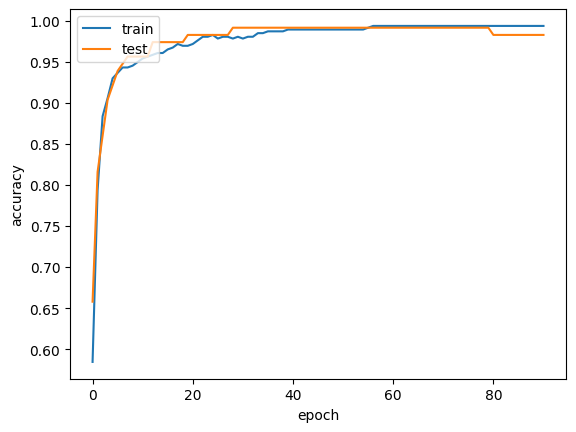

In [67]:
import matplotlib.pyplot as plt
plt.plot(model_new.history['accuracy'])
plt.plot(model_new.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()